# The `analosis` package

**Author**: Natalie B. Hogg

The `analosis` (`analysis` + `los`) package allows us to perform various analyses of the line-of-sight effects using `lenstronomy` while maintaining the same settings across the board. 

**Warning**: in reality this means many parameter choices are hard-coded inside `analosis`. 

This notebook provides the interface with the `analosis` package, allowing you to choose what type of lensing scenario to analyse and to save the results to your machine.

In [19]:
# set the path to analosis relative to this notebook
import sys
sys.path.append('../..')

# import the Run class which allows you to run the analysis of your choice
from analosis.run import Run

### Cosmology
Choose the cosmological parameters which will be used by `lenstronomy`, `astropy` and `colossus` (for halo mass functions). The `id` must match one of those known to `colossus`: https://bdiemer.bitbucket.io/colossus/cosmology_cosmology.html#standard-cosmologies.

### Scenario
Choose the scenario you want to analyse.

Options:
* `composite lens`
* `distributed haloes`

### Complexity
Set the model complexity: you can choose to fit the generated image with a perfect model, a perfect minimal model, or a variety of incomplete minimal models. **This choice is only relevant for the composite lens**. It will be ignored if you run the distributed haloes scenario.

Options:
* `perfect`: fits the generated image with a model consisting of `main lens` + `halo` + `LOS`
* `perfect minimal`: fits the generated image with a model consisting of `main lens` + `halo`+ `LOS MINIMAL`
* `missing halo`: fits the generated image with a model consisting of `main lens` +  `LOS MINIMAL`
* `missing offset`: fits the generated image with a model consisting of `main lens` + `halo` + `LOS MINIMAL`, with the halo centre fixed to zero
* `missing ellipticity`: fits the generated image with a model consisting of `main lens` + `halo` + `LOS MINIMAL`, with the halo ellipticity fixed to zero

### Number of runs
Choose the number of runs you want to do i.e. how many images will be created and fit.

### Parameters
Other parameters.

In [20]:
cosmology = {'id': 'planck18', 'H0': 67.4, 'Om': 0.315}

settings = {'scenario': 'composite lens',
            'complexity': 'perfect minimal',
            'lens_light': False,
            'number_of_images': 3,
            'MCMC': False,
            'job_name': 'test',
            'n_burn': 1,
            'n_run': 1}

parameters = {'maximum_shear': 0.03,
              'Einstein_radius_min': 0.5, # arcsec
              'maximum_source_offset_factor': 1,
              'sigma_halo_offset': 300} # pc

### Run
Finally, run the analysis. Note that you don't need to specify a path where you want your results to be saved: `analosis` automatically saves everything to a dedicated results directory. **Please don't push the contents of this directory to github!** (There is a .gitignore in place to prevent this, so you shouldn't have to worry about doing it accidentally).

In [21]:
result = Run(cosmology, settings, parameters)

Running the composite lens case with the following settings:

Model: perfect minimal
Number of runs: 3
Lens light: False
MCMC will not be run.

Analysis complete and results saved at /Users/pierrefleury/GitHub/analosis/analosis/results.


In [22]:
from analosis.analysis.plots import Plots
p = Plots()
#path = result.pathfinder()
path = '/Users/pierrefleury/GitHub/analosis/analosis/results'

### Image plot

Preparing image plot...


../../analosis/analysis/plots.py:68: RuntimeWarning: invalid value encountered in log10
  im = ax.matshow(np.log10(image_list[n]), origin='lower', vmin=v_min, vmax=v_max, cmap=cmap, extent=[0, 1, 0, 1])


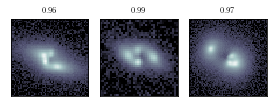

In [23]:
p.image_plot(path, settings, number_of_columns=10)

### Input vs output plot

In [24]:
p.input_output_plot(path, settings, show_not_converged=True)

AttributeError: You must run the sampler with 'store == True' before accessing the results

### Examine input kwargs

In [25]:
kwargs = pd.read_csv(path + '/datasets//input_kwargs.csv')
kwargs

,R_sersic_bar,n_sersic_bar,k_eff_bar,e1_bar,e2_bar,x_bar,y_bar,Rs,alpha_Rs,x_nfw,...,x_ll,y_ll,amp_ll,amp_sl,R_sersic_sl,n_sersic_sl,x_sl,y_sl,e1_sl,e2_sl
0,0.329085,3.533123,0.171445,-0.241017,0.215851,0,0,6.356087,0.816107,0.078421,...,0,0,341.194236,31.188235,0.306635,4.500886,0.084453,-0.165443,0.437729,-0.219209
1,0.274110,3.585824,0.204371,-0.157677,-0.083999,0,0,8.896390,0.819950,-0.035822,...,0,0,284.196387,31.188235,0.158026,3.248446,0.040724,0.027775,0.004964,-0.273906
2,0.410092,5.853148,0.107730,0.055057,-0.068803,0,0,7.425258,1.215121,0.098030,...,0,0,425.181968,31.188235,0.294348,4.522399,-0.142809,0.012694,-0.136440,0.155341
